# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON 441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 1.) US perm Visas csv from cycle using zip extractor


In [6]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [7]:
df["class_of_admission"].unique()

array(['J-1', 'B-2', 'H-1B', 'L-1', 'EWI', 'E-2', nan, 'E-1', 'H-2B',
       'TPS', 'F-1', 'B-1', 'C-1', 'Not in USA', 'TN', 'H-4', 'O-1',
       'R-1', 'L-2', 'Q', 'F-2', 'H-1B1', 'Parolee', 'G-5', 'E-3', 'H-2A',
       'VWT', 'P-1', 'A1/A2', 'D-1', 'A-3', 'R-2', 'H-1C', 'H-3', 'J-2',
       'P-4', 'I', 'H-1A', 'G-1', 'VWB', 'G-4', 'P-3', 'AOS/H-1B', 'O-3',
       'Parol', 'O-2', 'H1B', 'N', 'T-1', 'TD', 'M-1', 'K-1', 'U-1',
       'AOS', 'P-2', 'C-3', 'V-2', 'M-2'], dtype=object)

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [8]:
df_select = df[["case_status", "class_of_admission", "wage_offer_from_9089", "job_info_education", "employer_yr_estab"]]

# 3.) Clean your data for a decision tree


In [9]:
dummies = pd.get_dummies(df_select["class_of_admission"])
dummies2 = pd.get_dummies(df_select["job_info_education"])
X = pd.concat([dummies, dummies2, df_select[["wage_offer_from_9089", "employer_yr_estab"]]], axis = 1)
# X['wage_offer_from_9089'] = pd.to_numeric(X['wage_offer_from_9089'])
# X = X.drop(labels=135269, axis=0)
# X = X.drop(labels=135270, axis=0)
y = df["case_status"]

In [10]:
cleanX = X["wage_offer_from_9089"].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [11]:
cleanX = X.loc[list(cleanX.index)]

In [12]:
cleanX = cleanX.dropna()

In [13]:
cleanX

,A-3,A1/A2,AOS,AOS/H-1B,B-1,B-2,C-1,C-3,D-1,E-1,...,VWT,Associate's,Bachelor's,Doctorate,High School,Master's,None,Other,wage_offer_from_9089,employer_yr_estab
135297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,10.00,1994.0
135308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,14.01,1974.0
135329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9.51,1997.0
135341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,8.41,2000.0
135372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,7.85,1975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,77.70,2014.0
374200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,29.24,1994.0
374227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9.70,1958.0
374243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,10.40,1992.0


In [14]:
y = y.loc[list(cleanX.index)]

In [15]:
y

135297       Denied
135308       Denied
135329       Denied
135341       Denied
135372       Denied
            ...    
374195       Denied
374200       Denied
374227    Certified
374243    Certified
374294    Certified
Name: case_status, Length: 128999, dtype: object

# 4.) Fit and plot a decision tree of depth 3


In [16]:
from sklearn import tree

In [30]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(cleanX,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'wage_offer_from_9089 <= 33.435\ngini = 0.578\nsamples = 128999\nvalue = [60460, 57445, 6206, 4888]'),
 Text(0.25, 0.625, 'Not in USA <= 0.5\ngini = 0.692\nsamples = 6270\nvalue = [2767, 1399, 1427, 677]'),
 Text(0.125, 0.375, 'employer_yr_estab <= 1958.5\ngini = 0.683\nsamples = 2979\nvalue = [1101, 502, 1138, 238]'),
 Text(0.0625, 0.125, 'gini = 0.562\nsamples = 443\nvalue = [274, 83, 56, 30]'),
 Text(0.1875, 0.125, 'gini = 0.678\nsamples = 2536\nvalue = [827, 419, 1082, 208]'),
 Text(0.375, 0.375, 'employer_yr_estab <= 1999.5\ngini = 0.644\nsamples = 3291\nvalue = [1666, 897, 289, 439]'),
 Text(0.3125, 0.125, 'gini = 0.675\nsamples = 2300\nvalue = [940, 822, 185, 353]'),
 Text(0.4375, 0.125, 'gini = 0.439\nsamples = 991\nvalue = [726, 75, 104, 86]'),
 Text(0.75, 0.625, 'wage_offer_from_9089 <= 81614.5\ngini = 0.568\nsamples = 122729\nvalue = [57693, 56046, 4779, 4211]'),
 Text(0.625, 0.375, 'wage_offer_from_9089 <= 76328.0\ngini = 0.603\nsamples = 39966\nvalue = [1

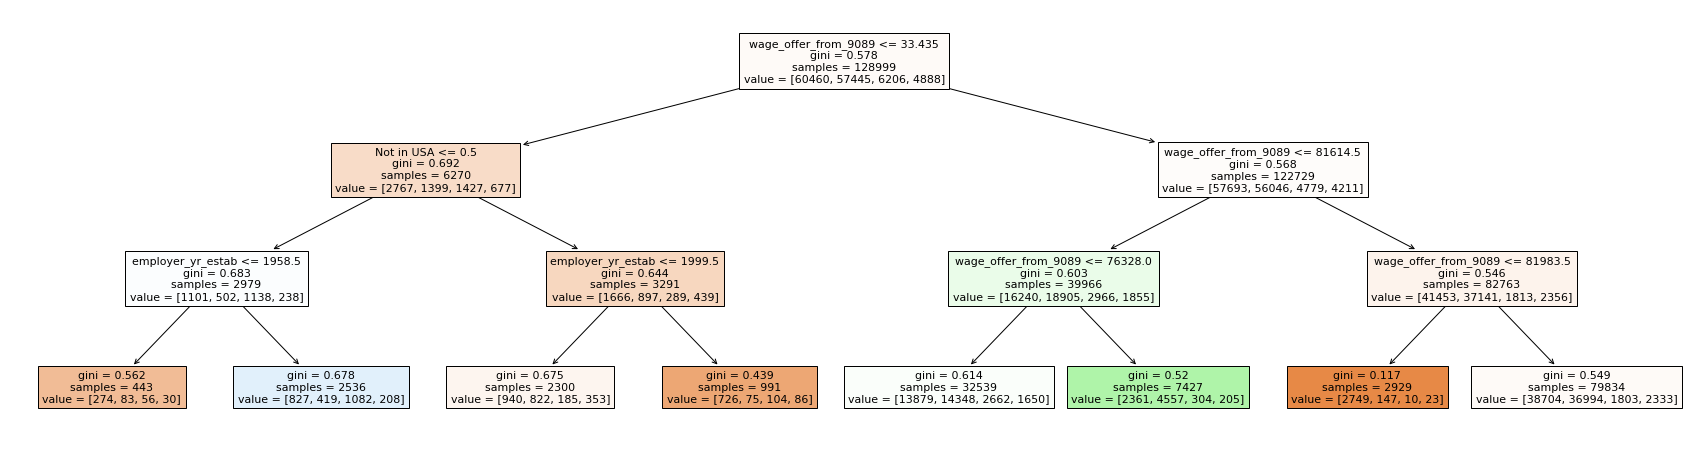

In [31]:
plt.figure(figsize = (30,8))
tree.plot_tree(clf, feature_names = cleanX.columns, filled = True)

# 5.) Write your interpretation of the largest (by sample size) leaf node


In [32]:
# We can see that the largest leaf node is the one with 79834 sample sizes. And it's the leaf node 
# where the `wage_offer_from_9089` is larger than 81983.5

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [33]:
from sklearn.model_selection import train_test_split

In [42]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
outputs = []
X_train, X_test, y_train, y_test = train_test_split(cleanX, y, test_size = 0.3)

for md in max_depth:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)

  oos_accuracy = clf.score(X_test, y_test)
  print("When the max_depth equals to " + str(md) + ", the out-of sample accuracy is " + str(oos_accuracy))
  outputs.append(oos_accuracy)

When the max_depth equals to 1, the out-of sample accuracy is 0.4664082687338501
When the max_depth equals to 2, the out-of sample accuracy is 0.4903875968992248
When the max_depth equals to 3, the out-of sample accuracy is 0.4921705426356589
When the max_depth equals to 4, the out-of sample accuracy is 0.509173126614987
When the max_depth equals to 5, the out-of sample accuracy is 0.5082428940568475
When the max_depth equals to 6, the out-of sample accuracy is 0.5225322997416021
When the max_depth equals to 7, the out-of sample accuracy is 0.5279069767441861
When the max_depth equals to 8, the out-of sample accuracy is 0.5303100775193799
When the max_depth equals to 9, the out-of sample accuracy is 0.5541602067183462
When the max_depth equals to 10, the out-of sample accuracy is 0.5608527131782945
When the max_depth equals to 11, the out-of sample accuracy is 0.5656847545219639
When the max_depth equals to 12, the out-of sample accuracy is 0.578501291989664
When the max_depth equals t

In [43]:
# We can see that when we have a train test split of 0.3 and max_depth = 20, 
# the out-of sample accuracy is the highest, which gives 0.6098966408268733